In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
housing = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
y = housing["median_house_value"].copy()
X = housing.drop("median_house_value", axis=1).copy()

# Pipeline

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())

])

categoric_pipeline = Pipeline([
    ("encoder", OneHotEncoder())
])

In [5]:
from sklearn.compose import ColumnTransformer

numeric_features = list(X.select_dtypes(include="number"))
categorical_features = list(X.select_dtypes(include="object"))

full_pipeline = ColumnTransformer([
        ("num", numeric_pipeline,   numeric_features),
        ("cat", categoric_pipeline, categorical_features),
    ])

X_prepared = full_pipeline.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=.2)

## let's try diffirent kernels on SVR


In [7]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


svr_rbf = SVR(kernel="rbf",   C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear",C=100, gamma="auto")
svr_poly= SVR(kernel="poly",  C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

### Linear Kernel

In [8]:
svr_lin.fit(X_train, y_train)
y_pred = svr_lin.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Test RMSE:", rmse)

Test RMSE: 71037.3094904113


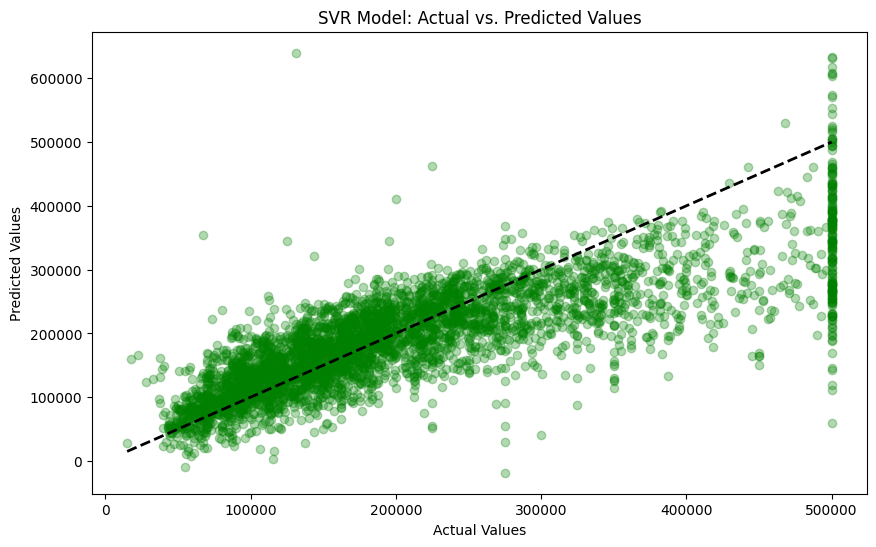

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Model: Actual vs. Predicted Values')
plt.show()

### Radial Basis Function Kernel

In [10]:
svr_rbf.fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Test RMSE:", rmse)

Test RMSE: 92599.92214626985


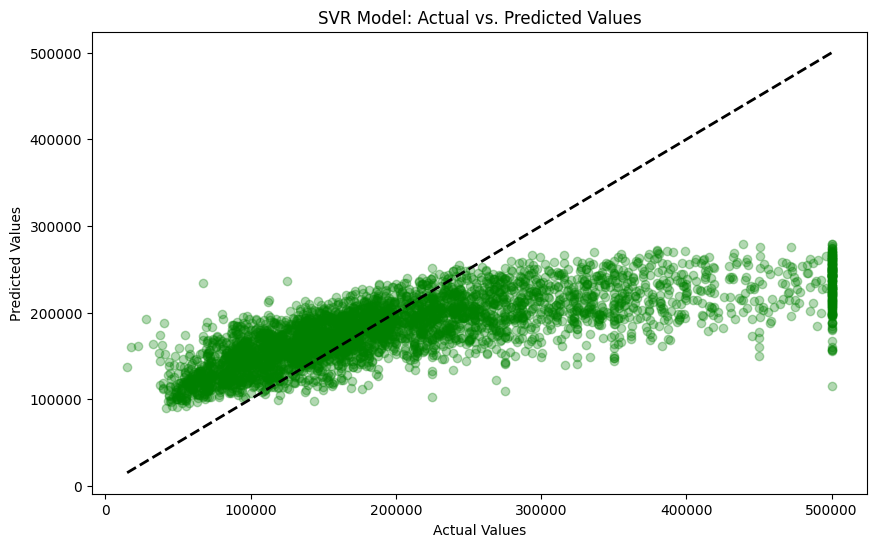

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Model: Actual vs. Predicted Values')
plt.show()

### Polynomial Kernel

In [12]:
svr_poly.fit(X_train, y_train)
y_pred = svr_poly.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Test RMSE:", rmse)

Test RMSE: 73759.68106180825


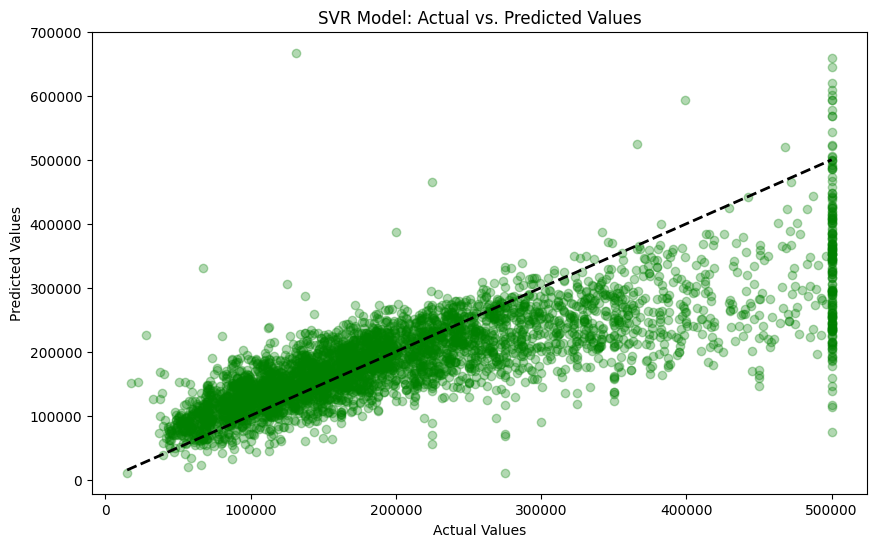

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Model: Actual vs. Predicted Values')
plt.show()

# Fine-Tune Your Model

## Grid Search

In [14]:
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {
    'kernel': ['rbf'],
    'C':[100]
}

grid_search = GridSearchCV(svr, param_grid, cv=3,
                           scoring="neg_mean_squared_error",
                           return_train_score=True,
                           )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVR(), param_grid={'C': [100], 'kernel': ['rbf']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [15]:
print("En İyi Parametreler:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Test RMSE:", rmse)

En İyi Parametreler: {'C': 100, 'kernel': 'rbf'}
Test RMSE: 92989.31308565733


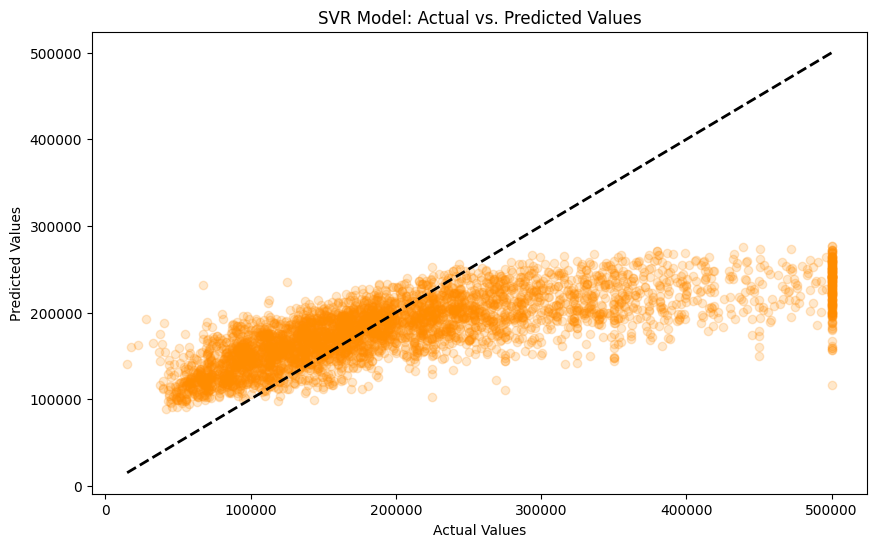

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.2, color="darkorange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Model: Actual vs. Predicted Values')
plt.show()

## RandomizedSearchCV

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = [
    {
        'kernel': ['rbf','poly'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
        'degree': expon(scale=1.0)
    },
    {
        'kernel': ['linear','sigmoid'],
        'C': reciprocal(20, 200000)
    }
]

svm_reg = SVR()

rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=30, cv=3, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END C=30704.49388394695, degree=0.2026485043181491, gamma=1.5127241738646855, kernel=rbf; total time=   0.0s
[CV] END C=30704.49388394695, degree=0.2026485043181491, gamma=1.5127241738646855, kernel=rbf; total time=   0.0s
[CV] END C=30704.49388394695, degree=0.2026485043181491, gamma=1.5127241738646855, kernel=rbf; total time=   0.0s
[CV] END C=1214.3978986882596, degree=0.10533264473289401, gamma=0.6147961650819368, kernel=rbf; total time=   0.0s
[CV] END C=1214.3978986882596, degree=0.10533264473289401, gamma=0.6147961650819368, kernel=rbf; total time=   0.0s
[CV] END C=1214.3978986882596, degree=0.10533264473289401, gamma=0.6147961650819368, kernel=rbf; total time=   0.0s
[CV] END .................C=74.55851806753965, kernel=linear; total time=   7.6s
[CV] END .................C=74.55851806753965, kernel=linear; total time=   7.5s
[CV] END .................C=74.55851806753965, kernel=linear; total time=   7.5s
[CV] E

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
42 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/_param_

RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=30,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a67aa7fae30>,
                                         'degree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a67aa7f88b0>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a67aa829f00>,
                                         'kernel': ['rbf', 'poly']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a67aa82bb50>,
                                         'kernel': ['linear', 'sigmoid']}],
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [18]:
print("En İyi Parametreler:", rnd_search.best_params_)

y_pred = rnd_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Test RMSE:", rmse)

En İyi Parametreler: {'C': 186155.65464054456, 'kernel': 'linear'}
Test RMSE: 69513.1841306219


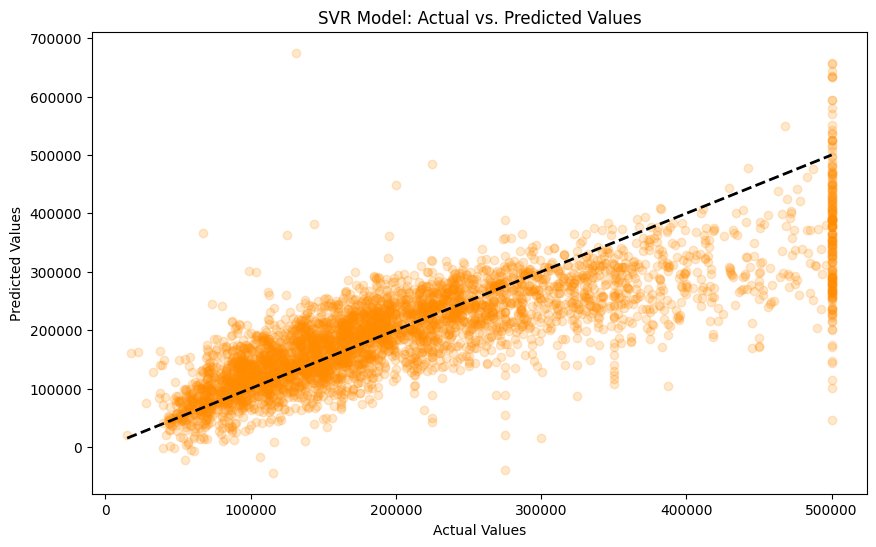

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.2, color="darkorange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Model: Actual vs. Predicted Values')
plt.show()